# Vocabulary

**-> explication tâche**



## Imports :

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## Other library related actions

In [2]:
nlp = spacy.load('en_core_web_sm')

/home/mari/miniconda3/lib/python3.10/site-packages/spacy/util.py:877: UserWarning: [W095] Model 'en_core_web_sm' (3.2.0) was trained with spaCy v3.2 and may not be 100% compatible with the current version (3.5.0). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


## Préprocessing

**-> explication tâche**

In [3]:
df = pd.read_csv("df_with_texts.csv")
df

,Unnamed: 0,Person,Subcategory,Category,Text
0,104,Jeanette Epps,American astronauts,Astronauts,"Jeanette Jo Epps (born November 3, 1970) is an..."
1,288,Sergey Avdeev,Russian cosmonauts,Astronauts,Sergei Vasilyevich Avdeyev (Сергей Васильевич ...
2,198,Matthias Maurer,German astronauts,Astronauts,Matthias Josef Maurer (born 18 March 1970) is ...
3,365,Andriyan Nikolayev,Soviet cosmonauts,Astronauts,Andriyan Grigoryevich Nikolayev (Chuvash and R...
4,412,Gennady Manakov,Soviet cosmonauts,Astronauts,Gennady Mikhailovich Manakov (Russian: Геннади...
...,...,...,...,...,...
395,7053,Uhwudong,Korean writers,Writers,"Eowudong or Uhwudong (어우동, 於宇同; 1440 - 18 Octo..."
396,5383,Óttar M. Norðfjörð,Icelandic writers,Writers,Óttar Martin Norðfjörð (born 1980) is an Icela...
397,4093,Claude Phillips,English writers,Writers,Sir Claude Phillips (29 January 1846 – 9 Augus...
398,7477,Francis Moto,Malawian writers,Writers,Professor Francis P. B. Moto (born 1952) is a ...


In [4]:
cat = df.Category.unique()
sub_cat = df.Subcategory.unique()
cat, sub_cat

(array(['Astronauts', 'Writers'], dtype=object),
 array(['American astronauts', 'Russian cosmonauts', 'German astronauts',
        'Soviet cosmonauts', 'Ukrainian cosmonauts', 'Belgian astronauts',
        'Hungarian astronauts', 'British astronauts',
        'Kazakhstani cosmonauts', 'Swedish astronauts',
        'Afghan cosmonauts', 'Lithuanian astronauts', 'Spanish astronauts',
        'Canadian astronauts', 'Japanese astronauts', 'Chinese astronauts',
        'Emirati astronauts', 'Czechoslovak cosmonauts',
        'Saudi Arabian astronauts', 'South African astronauts',
        'Italian astronauts', 'South Korean astronauts',
        'Kyrgyzstani cosmonauts', 'Dutch astronauts',
        'Czech cosmonauts and astronauts', 'Austrian astronauts',
        'Costa Rican astronauts', 'Danish astronauts',
        'Brazilian astronauts', 'Vietnamese astronauts',
        'Bulgarian cosmonauts', 'Australian astronauts',
        'Slovak cosmonauts', 'Indian astronauts', 'Polish astronauts',
  

In [56]:
cat_txt = {}
for c in cat:
    cat_txt[c] = df[df['Category']==c].Text.str.cat(sep=' ')

len(cat_txt)

2

In [58]:
sub_cat_txt = {}
for c in sub_cat:
    sub_cat_txt[c] = df[df['Subcategory']==c].Text.str.cat(sep=' ')

len(sub_cat_txt)

115

In [90]:
def preprocess(s:str)->str:
    """
    A little fonction containing all text preprocessing
    """
    doc = nlp(s.lower())
    tokens = [token.orth_ for token in doc]
    return tokens

d = {'a':"AI JEZIUFH IURES", 'b':"sjds fhiuds", 'c':"Apple APPLE apple"}
for k,v in d.items():
    d[k] = preprocess(v)

print(d['c'][0] == d['c'][1])
d['c'][0], d['c'][1]

True


('apple', 'apple')

In [91]:
cat_token = {}
for c in cat:
    tmp = []
    for i in df[df['Category']==c].Text:
        tmp.extend(preprocess(i))
    cat_token[c] = tmp
len(cat_token)

2

In [92]:
sub_cat_token = {}
for c in sub_cat:
    tmp = []
    for i in df[df['Subcategory']==c].Text:
        tmp.extend(preprocess(i))
    sub_cat_token[c] = tmp
len(sub_cat_token)

115

## Most frequents words

**-> explication tâche**

In [88]:
a = np.array(cat_token['Astronauts'])
unique, counts = np.unique(a, return_counts=True)
len(a), len(unique)
type(cat_token['Astronauts'][1])

spacy.tokens.token.Token

## Wordclouds

**-> explication tâche**

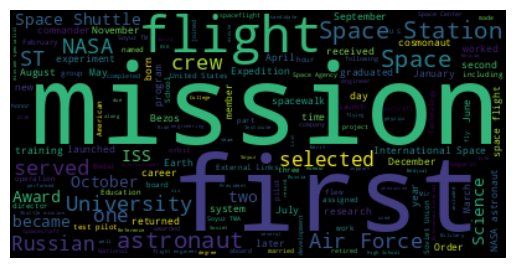

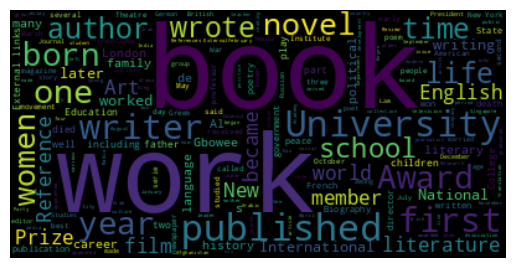

In [76]:
for k,v in cat_txt.items():
    wordcloud = WordCloud().generate(v)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    wordcloud.to_file("Viz/wc_by_cat/wc_"+k+".jpg")

In [77]:
for k,v in sub_cat_txt.items():
    wordcloud = WordCloud().generate(v)
    #plt.imshow(wordcloud, interpolation='bilinear')
    #plt.axis("off")
    #plt.show()
    wordcloud.to_file("Viz/wc_by_sub_cat/wc_"+k+".jpg")